## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_table = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
project_mice = mouse_study_table['Mouse ID'].unique()
total_mice = len(project_mice)
print(f'There are {total_mice} mice listed in the initial dataset.')

There are 249 mice listed in the initial dataset.


In [3]:
# How many duplicates are in the DataFrame. 
duplicates = mouse_study_table.duplicated().sum()
print(f'Total number of duplicates = {duplicates}')

Total number of duplicates = 1


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_table.loc[mouse_study_table.duplicated(keep=False),:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_table = mouse_study_table[mouse_study_table["Mouse ID"] !="g989"]
# mouse_study_table.drop_duplicates(subset = 'Mouse ID', keep = 'first', inplace = True)


In [6]:
# Checking the number of mice in the clean DataFrame.
new_file = clean_table['Mouse ID'].unique()
mice_data = len(new_file)
print(f'The clean DataFrame has {mice_data} mice in the new dataset.')

The clean DataFrame has 248 mice in the new dataset.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
clean_table.groupby('Drug Regimen').count()['Tumor Volume (mm3)']

drug_table_df = pd.DataFrame({
    'Tumor Volume Mean (mm3)': clean_table.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'],
    'Tumor Volume Median (mm3)': clean_table.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'],
    'Tumor Volume Variance (mm3)': clean_table.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'],
    'Tumor Volume Standard Deviation (mm3)': clean_table.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'],
    'Tumor Volume Standard Error (mm3)': clean_table.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
    
})

drug_table_df

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume Standard Deviation (mm3),Tumor Volume Standard Error (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_table = clean_table.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
single_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
clean_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

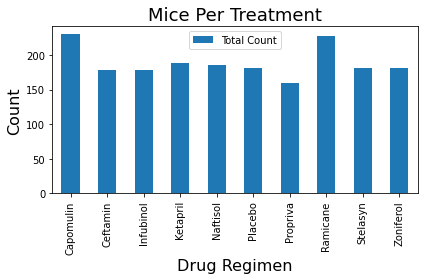

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_name = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
drug_count = [230, 178, 178, 188, 186, 181, 160, 228, 181, 182]

drug_total_df = pd.DataFrame({'Drug Regimen': drug_name, 'Total Count': drug_count})

panda_bar_plot = drug_total_df.plot.bar(x='Drug Regimen', y = 'Total Count')
plt.title("Mice Per Treatment",fontsize=18)
plt.xlabel("Drug Regimen",fontsize=16)
plt.ylabel("Count",fontsize=16)


plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()


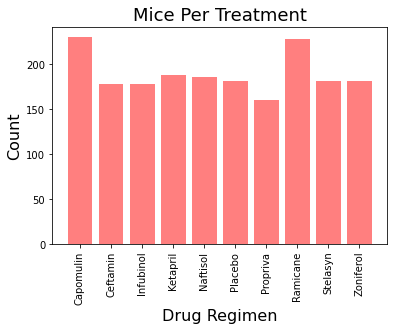

<Figure size 720x360 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(clean_table.groupby('Drug Regimen')['Tumor Volume (mm3)']))
plt.bar(x_axis, drug_count, color='r', alpha=0.5, align="center")

plt.title("Mice Per Treatment",fontsize=18)
plt.xlabel("Drug Regimen",fontsize=16)
plt.ylabel("Count",fontsize=16)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_name, rotation="vertical")
plt.figure(figsize=(10,5))
plt.tight_layout()
plt.show()

(-1.1751841875488713,
 1.1303558271612584,
 -1.1928576872782923,
 1.126752816440996)

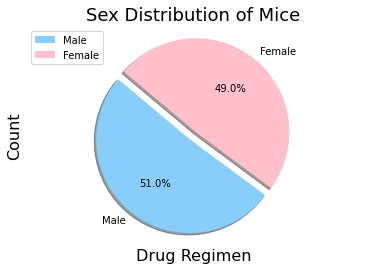

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# clean_table_df.groupby('Sex').count()['Mouse ID']
# mouse_gender = clean_table.groupby(['Mouse ID','Sex'])
mouse_gender = clean_table['Sex'].value_counts()
mouse_gender_df = pd.DataFrame(mouse_gender)

# Define chart parameters
colors = ["lightskyblue", "pink"]
explode = (0.1, 0)
gender_pie_chart = mouse_gender_df.plot(kind="pie", y='Sex', explode=explode, colors = colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Edit Labels
plt.title("Sex Distribution of Mice",fontsize=18)
plt.xlabel("Drug Regimen",fontsize=16)
plt.ylabel("Count",fontsize=16)

#Create axes
plt.axis("equal")


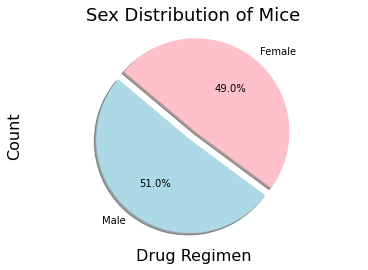

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
clean_table.columns
gender_df = clean_table[['Sex']]
gender_df.value_counts()


sex = ["Male", "Female"]
sex_counts = [958, 922]
colors = ["lightblue","pink"]
explode = (0.1,0)

# Create a pie chart with pyplot
plt.pie(sex_counts, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Edit Labels
plt.title("Sex Distribution of Mice",fontsize=18)
plt.xlabel("Drug Regimen",fontsize=16)
plt.ylabel("Count",fontsize=16)

# Create axes
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

Capomulin_final = mouse_study_table.loc[mouse_study_table["Drug Regimen"] == "Capomulin",:]
Ramicane_final = mouse_study_table.loc[mouse_study_table["Drug Regimen"] == "Ramicane",:]
Infubinol_final = mouse_study_table.loc[mouse_study_table["Drug Regimen"] == "Infubinol",:]
Ceftamin_final = mouse_study_table.loc[mouse_study_table["Drug Regimen"] == "Ceftamin",:]

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint


# drug_list_df = pd.DataFrame(drug_regimens_list)
# # pd.merge(Capomulin_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
# drug_merge_file = pd.merge(drug_list_df,mouse_study_table, on=('Mouse ID', 'Drug Regimen'), how='left')
# drug_merge_file

# Capomulin
Capomulin_max = Capomulin_final.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_max)
Capomulin_merge = pd.merge(Capomulin_vol, mouse_study_table, on=("Mouse ID","Timepoint"),how="left")


# Ramicane
Ramicane_max = Ramicane_final.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_max)
Ramicane_merge = pd.merge(Ramicane_vol, mouse_study_table, on=("Mouse ID","Timepoint"),how="left")


# Infubinol
Infubinol_max = Infubinol_final.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_max)
Infubinol_merge = pd.merge(Infubinol_vol, mouse_study_table, on=("Mouse ID","Timepoint"),how="left")


# Ceftamin
Ceftamin_max = Ceftamin_final.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_max)
Ceftamin_merge = pd.merge(Ceftamin_vol, mouse_study_table, on=("Mouse ID","Timepoint"),how="left")


In [15]:
# Calculate the final tumor volume of each mouse across the Capomulin regimen
Capomulin_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [16]:
# Calculate the final tumor volume of each mouse across the Ramincane regimen
Ramicane_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [17]:
# Calculate the final tumor volume of each mouse across the Infubinol regimen
Infubinol_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [18]:
# # Calculate the final tumor volume of each mouse across the Ceftamin regimen
Ceftamin_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [19]:
# Create DataFrame with all of the final tumor volumes of each mouse
drug_regimens_list = [Capomulin_merge, Ramicane_merge, Infubinol_merge, Ceftamin_merge] 
drug_reg_df= pd.concat(drug_regimens_list, axis = 0, ignore_index=False)
drug_reg_final = drug_reg_df.drop(columns=['Sex','Age_months', 'Weight (g)', 'Metastatic Sites']) 
drug_reg_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
20,x226,0,Ceftamin,Male,23,28,45.000000,0
21,x581,45,Ceftamin,Female,19,28,64.634949,3
22,x822,45,Ceftamin,Male,3,29,61.386660,3
23,y769,45,Ceftamin,Female,6,27,68.594745,4


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatment_list:
    x_volume = drug_reg_final.loc[drug_reg_final['Drug Regimen']==x]['Tumor Volume (mm3)']
    tumor_vol_data.append(x_volume)


    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = x_volume.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers_treatment = x_volume.loc[(x_volume < lower_bound) | (x_volume > upper_bound)]


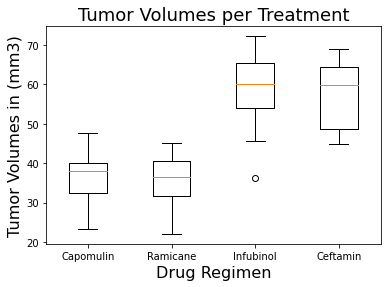

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels = treatment_list)
plt.title('Tumor Volumes per Treatment',fontsize=18)
plt.xlabel('Drug Regimen',fontsize=16)
plt.ylabel('Tumor Volumes in (mm3)',fontsize=16)
plt.show()

## Line and Scatter Plots

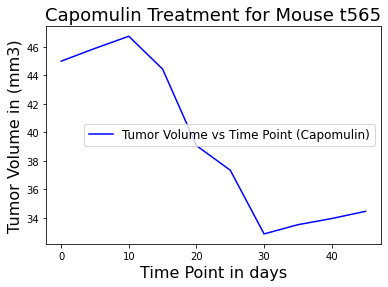

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df = Capomulin_final.loc[Capomulin_final["Mouse ID"] == "t565",:]

# Collect the the timepoints and tumor volumes
x = line_plot_df['Timepoint']
y = line_plot_df['Tumor Volume (mm3)']
line, = plt.plot(x, y, color="blue", label="Tumor Volume vs Time Point (Capomulin)")
plt.title('Capomulin Treatment for Mouse t565',fontsize=18)
plt.xlabel('Time Point in days',fontsize=16)
plt.ylabel('Tumor Volume in (mm3)',fontsize=16)
plt.legend(handles=[line],loc="best",fontsize=12)
plt.show()
plt.tight_layout



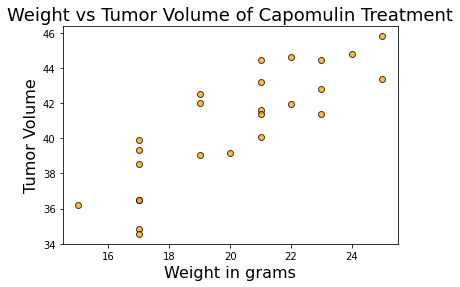

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capo_file = Capomulin_final.drop(columns=['Sex','Age_months', 'Timepoint','Metastatic Sites'])
Capo_mouse = Capo_file.groupby('Mouse ID')

y_axis = Capo_mouse['Tumor Volume (mm3)'].mean()
x_axis = Capo_mouse['Weight (g)'].mean()

# plt.scatter(weight_avg_cap,tumor_avg_cap)
# # avg_cap = drug_reg_df.groupby('MouseID').mean()['Capomulin']
# # avg_cap
# scatter_mouse_df = pd.DataFrame({
#     'Weight': [weight_avg_cap],
#     'Tumor Volume': [tumor_avg_cap]})
# scatter_mouse_df

# x_axis = scatter_mouse_df['Weight']
# y_axis = scatter_mouse_df['Tumor Volume']

plt.scatter(x_axis,y_axis, marker='o', facecolors="orange", edgecolors='black', alpha=.75 )
plt.title('Weight vs Tumor Volume of Capomulin Treatment',fontsize=18)
plt.xlabel('Weight in grams',fontsize=16)
plt.ylabel('Tumor Volume',fontsize=16)
plt.show()


## Correlation and Regression

The correlation coefficient is 0.84


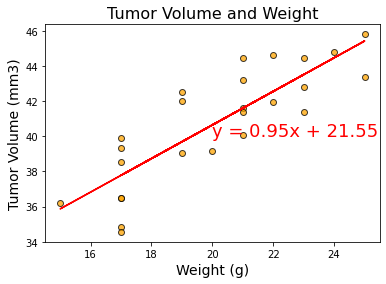

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#set x and y
# x_values = mouse_df["Weight (g)"]
# y_values = mouse_df["Tumor Volume (mm3)"]

#calculate the regression line/regress values
(cap_slope, cap_intercept, cap_rvalue, cap_pvalue, cap_stderr) = st.linregress(x_axis, y_axis)
cap_fit = x_axis * cap_slope + cap_intercept
plt.scatter(x_axis,y_axis, marker='o', facecolors="orange", edgecolors='black', alpha=.75 )

# Plot scatter plot with regression line equation
line_eq = "y = " + str(round(cap_slope,2)) + "x + " + str(round(cap_intercept,2))
plt.annotate(line_eq,(20,40),fontsize=18,color="red")
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# #plot scatter
# plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
#             s=x_values, alpha=0.75)
plt.title("Tumor Volume and Weight",fontsize=16)
plt.xlabel("Weight (g)",fontsize=14)
plt.ylabel("Tumor Volume (mm3)",fontsize=14)

#plot line
plt.plot(x_axis,cap_fit,"r-")
# plt.annotate(line_eq,(20,37),fontsize=12,color="red")

#print correlation coefficient
print(f"The correlation coefficient is {round(st.pearsonr(x_axis,y_axis)[0],2)}")